<a href="https://colab.research.google.com/github/jdpaezr/R1/blob/main/Linear_Regression_with_Numerical_and_Categorical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
path='https://raw.githubusercontent.com/jdpaezr/R1/main/Datasets-main/datasets/reg_data.csv'
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
df=pd.read_csv(path)
df.head()

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,1.0,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,1.0,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,2.0,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,2.0,90.0,BMW,Master,2000
4,Female,1500.0,29.0,1.0,67.0,Ford,Master,2010


## 1. What is the impact of `Age` in `Salary`?

Salary = b0 +b1*Age

In [31]:
favs=['Salary','Age']
ndf= df[favs].dropna()
ndf.isnull().any()

Salary    False
Age       False
dtype: bool

<Axes: xlabel='Age', ylabel='Salary'>

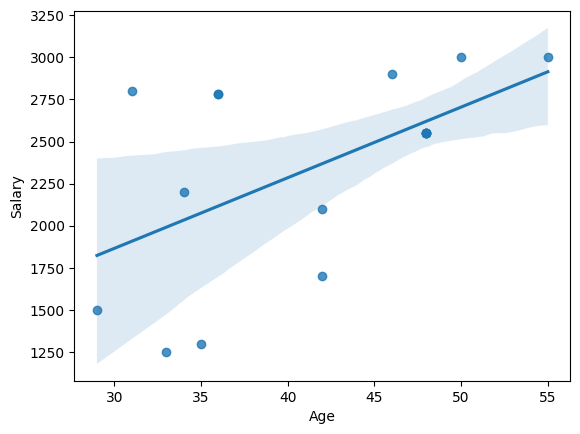

In [32]:
sns.regplot(data=ndf, x= 'Age', y= 'Salary')

## 2. What is the 'Salary' of a Person with 'Age' 33 and Weight 80?

Salary = b0 +b1*Age+b2*Weight

In [33]:
favs=['Salary','Age','Weight']
ndf= df[favs].dropna()
ndf.isnull().any()
ndf.shape

(16, 3)

In [34]:
model2= sm.OLS.from_formula('Salary~Age + Weight',data=ndf).fit()
model2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.022
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0836
Time:                        20:16:35   Log-Likelihood:                -121.52
No. Observations:                  16   AIC:                             249.0
Df Residuals:                      13   BIC:                             251.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    871.9180   1234.042      0.707      0.492   -1794.069    3537.905
Age           41.1645     17.985      2.289      0.039       2.309      80.019
Weight        -3.1434     11.090     -0.283      0.781     -27.101      20.814
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.398
Skew:                           0.051   Prob(JB):                        0.820
Kurtosis:                       2.234   Cond. No.                         779.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print('The salary of a person with age 33 and weight 80 is:', 871.9180+41.1645*33+-3.1434*80)


The salary of a person with age 33 and weight 80 is: 1978.8745000000001


In [36]:
print('The predicted values are:',model2.fittedvalues)
print('The residuals are:',model2.resid)

The predicted values are: 0     2061.204501
1     1971.017166
2     1954.657980
3     2317.922014
4     1855.081551
5     2412.223069
6     2688.101459
7     2893.923743
8     1874.543094
9     2545.447211
10    2174.666433
11    2646.636336
14    2174.666433
16    2646.636336
17    2646.636336
18    2646.636336
dtype: float64
The residuals are: 0    -761.204501
1    -721.017166
2     245.342020
3    -217.922014
4    -355.081551
5    -712.223069
6     311.898541
7     106.076257
8     925.456906
9     354.552789
10    605.333567
11    -96.636336
14    605.333567
16    -96.636336
17    -96.636336
18    -96.636336
dtype: float64


In [37]:
study= [ndf.Age, ndf.Salary, model2.fittedvalues,ndf.Weight, model2.resid]
study

[0     35.0
 1     33.0
 2     34.0
 3     42.0
 4     29.0
 5     42.0
 6     50.0
 7     55.0
 8     31.0
 9     46.0
 10    36.0
 11    48.0
 14    36.0
 16    48.0
 17    48.0
 18    48.0
 Name: Age, dtype: float64,
 0     1300.0
 1     1250.0
 2     2200.0
 3     2100.0
 4     1500.0
 5     1700.0
 6     3000.0
 7     3000.0
 8     2800.0
 9     2900.0
 10    2780.0
 11    2550.0
 14    2780.0
 16    2550.0
 17    2550.0
 18    2550.0
 Name: Salary, dtype: float64,
 0     2061.204501
 1     1971.017166
 2     1954.657980
 3     2317.922014
 4     1855.081551
 5     2412.223069
 6     2688.101459
 7     2893.923743
 8     1874.543094
 9     2545.447211
 10    2174.666433
 11    2646.636336
 14    2174.666433
 16    2646.636336
 17    2646.636336
 18    2646.636336
 dtype: float64,
 0      80.0
 1      82.5
 2     100.8
 3      90.0
 4      67.0
 5      60.0
 6      77.0
 7      77.0
 8      87.0
 9      70.0
 10     57.0
 11     64.0
 14     57.0
 16     64.0
 17     64.0
 18     6

In [38]:
st=pd.concat(study, axis=1)
new_names={0:'fit_val', 1: 'resid'}
st.rename(new_names, axis=1 , inplace=True)
st

,Age,Salary,fit_val,Weight,resid
0,35.0,1300.0,2061.204501,80.0,-761.204501
1,33.0,1250.0,1971.017166,82.5,-721.017166
2,34.0,2200.0,1954.657980,100.8,245.342020
3,42.0,2100.0,2317.922014,90.0,-217.922014
4,29.0,1500.0,1855.081551,67.0,-355.081551
5,42.0,1700.0,2412.223069,60.0,-712.223069
6,50.0,3000.0,2688.101459,77.0,311.898541
7,55.0,3000.0,2893.923743,77.0,106.076257
8,31.0,2800.0,1874.543094,87.0,925.456906
9,46.0,2900.0,2545.447211,70.0,354.552789


In [39]:
model2.resid.describe()

count    1.600000e+01
mean     1.278977e-13
std      4.967392e+02
min     -7.612045e+02
25%     -2.522119e+02
50%     -9.663634e+01
75%      3.225621e+02
max      9.254569e+02
dtype: float64

##3.What is the salary of a female?

In [43]:
favs=['Salary','Gender']
ndf= df[favs].dropna()
ndf.isnull().any()
ndf

,Salary,Gender
0,1300.0,Female
1,1250.0,Female
2,2200.0,Male
3,2100.0,Male
4,1500.0,Female
5,1700.0,Female
6,3000.0,Male
7,3000.0,Male
8,2800.0,Female
9,2900.0,Male


In [42]:
model3= sm.OLS.from_formula('Salary~Gender',data=ndf).fit()
model3.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.605
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0318
Time:                        20:20:37   Log-Likelihood:                -129.59
No. Observations:                  17   AIC:                             263.2
Df Residuals:                      15   BIC:                             264.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2015.7143    199.011     10.129      0.000    1591.532    2439.897
Gender[T.Male]   614.2857    259.479      2.367      0.032      61.220    1167.352
==============================================================================
Omnibus:                        1.714   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                0.955
Skew:                           0.147   Prob(JB):                        0.620
Kurtosis:                       1.877   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print('The salary of a female is:', 2015.7143+0*614.2857)
print('The salary of a male is:', 2015.7143+1*614.2857)


The salary of a female is: 2015.7143
The salary of a male is: 2630.0


Since the coeficient is for the male side we multiply the constant by cero if it is a female and by 1 if it is a male

##4. What is the salary of a person age 33 works in ford and is from place 1?

In [ ]:
favs=['Salary','Age','Company','Place']
ndf= df[favs].dropna()
ndf.isnull().any()
ndf

In [53]:
ndf['Place']=ndf['Place'].astype(str)


 Debido a que place esta como numerica y es una variable categorica se tiene que cambiar a string para que de resultados que hagan sentido

In [56]:
model4= sm.OLS.from_formula('Salary~Age+Company+Place',data=ndf).fit()
model4.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     2.841
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0825
Time:                        20:40:07   Log-Likelihood:                -109.88
No. Observations:                  15   AIC:                             231.8
Df Residuals:                       9   BIC:                             236.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1012.6330    938.033      1.080      0.308   -1109.345    3134.611
Company[T.Ford]    46.2978    323.464      0.143      0.889    -685.428     778.024
Company[T.GM]     515.9314    496.103      1.040      0.325    -606.331    1638.194
Place[T.2.0]      601.3640    298.264      2.016      0.075     -73.356    1276.084
Place[T.3.0]      870.4223    479.168      1.817      0.103    -213.531    1954.376
Age                15.3491     27.010      0.568      0.584     -45.751      76.449
==============================================================================
Omnibus:                        1.615   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                0.602
Skew:                          -0.488   Prob(JB):                        0.740
Kurtosis:                       3.113   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print('The salary of a person age 33 works in ford and is from place 1 is:', 768.8740+1*1.0562+33*9.4221)

The salary of a person age 33 works in ford and is from place 1 is: 1080.8595
